In [67]:
import seaborn as sns 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats.mstats import winsorize
# %matplotlib inline

# #윈도우 폰트 
# from matplotlib import rc
# rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

## 함수

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
import sklearn.svm as svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


def clf(model,):
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier() 
    xg = XGBClassifier()
    svm = svm.SVC(kernel = 'rbf')
    lr = LogisticRegression()
    
    return rf, gb, xg, svm, lr


## 상관계수 보기 (min) - 상관계수 0.6이상 제거

<AxesSubplot:title={'center':'수축기 min_corr'}>

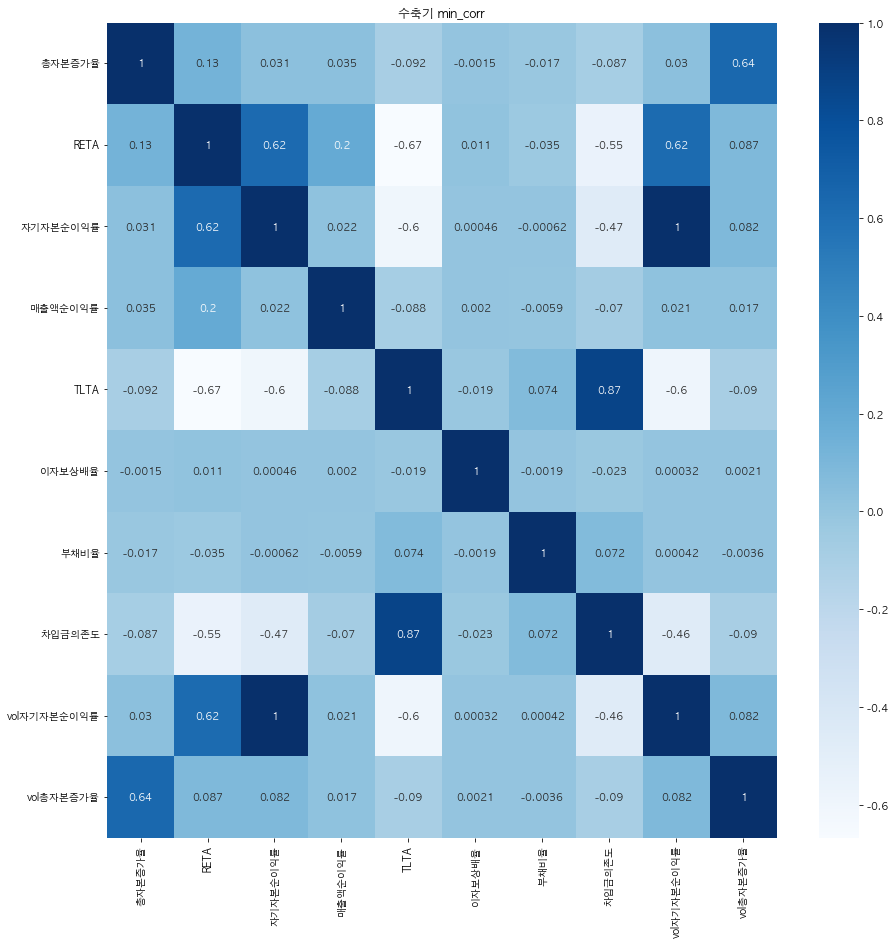

In [95]:
recession_d= pd.read_csv('../Data/NA/recession_default.csv',encoding='cp949')
recession_nor = pd.read_csv('../Data/NA/recession_normal.csv',encoding='cp949')
recession = pd.concat([recession_d,recession_nor],axis=0)

# MinMax
select_min_recession = ['총자본증가율',
'RETA',
'자기자본순이익률',
'매출액순이익률',
'TLTA',
'이자보상배율',
'부채비율',
'차입금의존도',
'vol자기자본순이익률',
'vol총자본증가율']

recession_min =recession[select_min_recession]

corr_min = recession_min.corr()
plt.figure(figsize=(15,15))
plt.title('수축기 min_corr')
sns.heatmap(corr_min,annot=True,cmap='Blues')


# min 순위
['vol자기자본순이익률','TLTA',{'RETA'},{'자기자본순이익률'},'부채비율','차입금의존도','매출액순이익률','총자본증가율',{'vol총자본증가율'},'매출액영업이익률','총자본영업이익률','당좌비율']</br>

총자본증가율 / ##vol총자본증가율</br>
RETA / ##자기자본순이익률</br>
TLTA / ##차입금의존도</br>
##RETA / vol자기자본순이익률</br>
##자기자본순이익률/vol자기자본순이익률</br>
TLTA/## vol자기자본순이익률

TLTA / ##RETA

TLTA/##자기자본순이익률

# min 순위,corr 0.6이상 제거 후 
['vol자기자본순이익률','TLTA','부채비율','차입금의존도','매출액순이익률','총자본증가율','매출액영업이익률','총자본영업이익률','당좌비율']</br>

제거된 변수(RETA,자기자본순이익률,vol총자본증가율)</br>

## 수축기 MinMax  

In [97]:
recession_select_min =['vol자기자본순이익률','TLTA','부채비율','차입금의존도','매출액순이익률','총자본증가율','매출액영업이익률','총자본영업이익률','당좌비율']

recession_min = pd.read_csv('../Data/WIN_UP/recession_win_min_smote.csv',encoding='cp949')
test_min = pd.read_csv('../Data/WIN_UP/recession_win_min_test.csv',encoding='cp949')

# train
X_train_min = recession_min[recession_select_min]
y_train_min = recession_min['부도']

# test
X_test = test_min[recession_select_min]
y_test = test_min.iloc[:,-1]

#### 수축기 SVM min

In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_grid.fit(X_train_min, y_train_min)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.846 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)

In [74]:
from sklearn.metrics import f1_score

svm_clf =SVC(C=1000, gamma=1)
svm_clf.fit(X_train_min,y_train_min)
svm_y_pred = svm_clf.predict(X_test)
svm_y_pred
svm_f1 = f1_score(y_test,svm_y_pred)
svm_f1

0.5494505494505494

In [75]:
svm_grid_predictions = svm_grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, svm_grid_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1507
         1.0       0.47      0.66      0.55        38

    accuracy                           0.97      1545
   macro avg       0.73      0.82      0.77      1545
weighted avg       0.98      0.97      0.98      1545



#### 수축기 RF min

In [76]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[50,70,90,100,150]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_train_min, y_train_min)
# final_model = grid_search.best_estimator_
# final_model

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=150,
                       random_state=1024)

In [77]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=150,
                       random_state=1024)
tree.fit(X_train_min,y_train_min)
y_rf_pred = tree.predict(X_test)
rf_f1 = f1_score(y_test,y_rf_pred)
rf_f1

0.8823529411764706

In [78]:
rf_prediction = tree.predict(X_test)
 
# print classification report
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1507
         1.0       1.00      0.79      0.88        38

    accuracy                           0.99      1545
   macro avg       1.00      0.89      0.94      1545
weighted avg       0.99      0.99      0.99      1545



#### 수축기 LR min

In [79]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_min,y_train_min)
lr_pred = lr.predict(X_test)
lr_f1 = f1_score(y_test,lr_pred)
lr_f1

lr_predictions = lr.predict(X_test)
 
# print classification report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1507
         1.0       0.22      0.74      0.34        38

    accuracy                           0.93      1545
   macro avg       0.60      0.83      0.65      1545
weighted avg       0.97      0.93      0.95      1545



In [80]:
import statsmodels.api as sm
lr_model = sm.Logit(y_train_min,X_train_min)
lr_results = lr_model.fit()
lr_results.summary()
# np.exp(results.params) 로지스틱 회귀계수 출력

Optimization terminated successfully.
         Current function value: 0.205859
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     부도   No. Observations:                 5271
Model:                          Logit   Df Residuals:                     5261
Method:                           MLE   Df Model:                            9
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.6766
Time:                        16:20:42   Log-Likelihood:                -1085.1
converged:                       True   LL-Null:                       -3355.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
총자본증가율          0.4419      0.220      2.011      0.044       0.011       0.873
RETA           -4.3296      0.504     -8.588      0.000      -5.318      -3.342
자기자본순이익률       -8.4145      0.588    -14.311      0.000      -9.567      -7.262
매출액순이익률         0.0906      0.599      0.151      0.880      -1.083       1.264
TLTA            6.8458      0.708      9.669      0.000       5.458       8.233
이자보상배율        -14.7216      0.617    -23.852      0.000     -15.931     -13.512
부채비율            0.7844      0.428      1.833      0.067      -0.054       1.623
차입금의존도          1.2288      0.496      2.476      0.013       0.256       2.202
vol자기자본순이익률     2.8801      0.451      6.393      0.000       1.997       3.763
vol총자본증가율       1.2571      0.307      4.093      0.000       0.655       1.859
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### 수축기 XGB min

In [81]:
# 수축기 xgb min
import xgboost
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier()
xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
grid_search_xg.fit(X_train_min, y_train_min)
best_xg = grid_search_xg.best_estimator_
best_xg

# XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
#               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
#               early_stopping_rounds=None, enable_categorical=False,
#               eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
#               importance_type=None, interaction_constraints='',
#               learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
#               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
#                monotone_constraints='()', n_estimators=32, n_jobs=0,
#               num_parallel_tree=1, predictor='auto', random_state=99,
#               reg_alpha=0, reg_lambda=1)

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=32, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1)
xgb.fit(X_train_min,y_train_min)
xgb_pred = xgb.predict(X_test)
f1_score(xgb_pred,y_test)

0.7948717948717949

In [83]:
xg_prediction = xgb.predict(X_test)
 
# print classification report
print(classification_report(y_test, xg_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1507
         1.0       0.78      0.82      0.79        38

    accuracy                           0.99      1545
   macro avg       0.89      0.90      0.89      1545
weighted avg       0.99      0.99      0.99      1545



--------------------------------------------------

## 상관계수 보기 (std) - 상관계수 0.6이상 제거

<AxesSubplot:title={'center':'수축기 std_corr'}>

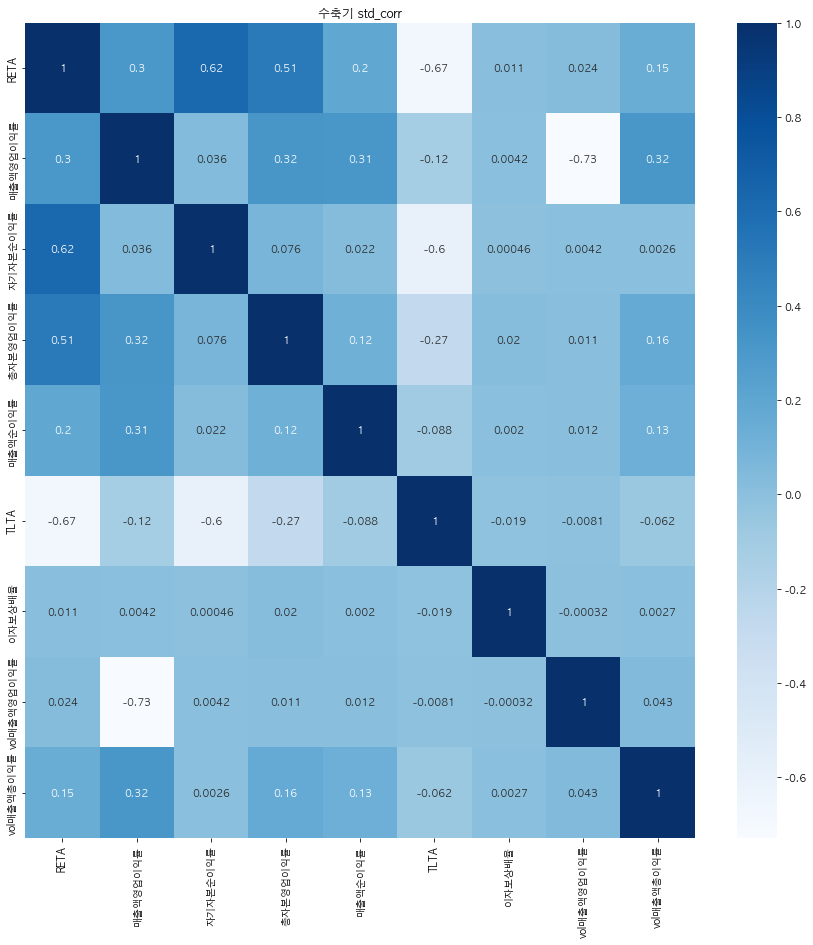

In [115]:
recession_d= pd.read_csv('../Data/NA/recession_default.csv',encoding='cp949')
recession_nor = pd.read_csv('../Data/NA/recession_normal.csv',encoding='cp949')
recession = pd.concat([recession_d,recession_nor],axis=0)

# std
select_std_recession = ['RETA',
'매출액영업이익률',
'자기자본순이익률',
'총자본영업이익률',
'매출액순이익률',
'TLTA',
'이자보상배율',
'vol매출액영업이익률',
'vol매출액총이익률']

recession_std=recession[select_std_recession]

corr_std = recession_std.corr()
plt.figure(figsize=(15,15))
plt.title('수축기 std_corr')
sns.heatmap(corr_std,annot=True,cmap='Blues')


# std 순위
['vol자기자본순이익률','TLTA','{RETA}','매출액순이익률',{'자기자본순이익률'},'부채비율',이자보상배율','매출액영업이익률','총자본증가율','총자본영업이익률','차입금의존도','vol 총 자본 증가율']

##자기자본순이익률 / RETA
TLTA / {RETA}
{vol매출액영업이익률} / 매출액영업이익률
TLTA / ##자기자본순이익률


# std 순위,corr 0.6이상 제거 후 
['vol자기자본순이익률','TLTA','매출액순이익률','부채비율',이자보상배율','매출액영업이익률','총자본증가율','총자본영업이익률','차입금의존도','vol 총 자본 증가율']</br>

제거된 변수(자기자본순이익률,RETA))</br>



#### 수축기 STD

In [116]:
recession_select_std =['vol자기자본순이익률','TLTA','매출액순이익률','부채비율','이자보상배율','매출액영업이익률','총자본증가율','총자본영업이익률','차입금의존도','vol총자본증가율']

recession_std = pd.read_csv('../Data/WIN_UP/recession_win_std_smote.csv',encoding='cp949')
test_std = pd.read_csv('../Data/WIN_UP/recession_win_std_test.csv',encoding='cp949')

# train
X_train_std = recession_std[recession_select_std]
y_train_std = recession_std['부도']

# test
X_test = test_std[recession_select_std]
y_test = test_std.iloc[:,-1]

#### 수축기 SVM STD

In [117]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_grid.fit(X_train_std, y_train_std)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.901 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [118]:
# print best parameter after tuning
print(svm_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)

In [120]:
from sklearn.metrics import f1_score

svm_clf =SVC(C=100, gamma=0.1, kernel = 'rbf')
svm_clf.fit(X_train_std,y_train_std)
svm_y_pred = svm_clf.predict(X_test)
svm_y_pred
svm_f1 = f1_score(y_test,svm_y_pred)
svm_f1

0.6904761904761905

In [121]:
svm_grid_predictions = svm_grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, svm_grid_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1507
         1.0       0.63      0.76      0.69        38

    accuracy                           0.98      1545
   macro avg       0.81      0.88      0.84      1545
weighted avg       0.99      0.98      0.98      1545



#### 수축기 RF std

In [122]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[50,70,90,100,150]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search_std = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search_std.fit(X_train_std, y_train_std)
# final_model_std = grid_search_std.best_estimator_
# final_model_std

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomForestClassifier(max_depth=9, max_features='auto', random_state=1024)

RandomForestClassifier(max_depth=9, max_features='auto', random_state=1024)

In [123]:
from sklearn.ensemble import RandomForestClassifier

tree_std = RandomForestClassifier(max_depth=9, max_features='auto',
                       random_state=1024)
tree_std.fit(X_train_std,y_train_std)
y_rf_pred_std = tree.predict(X_test)
rf_f1_std = f1_score(y_test,y_rf_pred)
rf_f1_std

0.8823529411764706

In [125]:
rf_prediction_std = tree_std.predict(X_test)
 
# print classification report
print(classification_report(y_test, rf_prediction_std))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1507
         1.0       0.97      0.82      0.89        38

    accuracy                           0.99      1545
   macro avg       0.98      0.91      0.94      1545
weighted avg       0.99      0.99      0.99      1545



#### 수축기 LR std

In [126]:
from sklearn.linear_model import LogisticRegression

lr_std = LogisticRegression()
lr_std.fit(X_train_std,y_train_std)
lr_pred_std = lr_std.predict(X_test)
lr_f1_std = f1_score(y_test,lr_pred_std)
lr_f1_std

lr_predictions_std = lr_std.predict(X_test)
 
# print classification report
print(classification_report(y_test, lr_predictions_std))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      1507
         1.0       0.23      0.76      0.36        38

    accuracy                           0.93      1545
   macro avg       0.61      0.85      0.66      1545
weighted avg       0.97      0.93      0.95      1545



In [127]:
import statsmodels.api as sm
lr_model_std = sm.Logit(y_train_std,X_train_std)
lr_results_std = lr_model_std.fit()
lr_results_std.summary()
# np.exp(results.params) 로지스틱 회귀계수 출력

Optimization terminated successfully.
         Current function value: 0.496615
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     부도   No. Observations:                 5271
Model:                          Logit   Df Residuals:                     5261
Method:                           MLE   Df Model:                            9
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.2198
Time:                        20:21:12   Log-Likelihood:                -2617.7
converged:                       True   LL-Null:                       -3355.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
vol자기자본순이익률     0.0130      0.036      0.363      0.717      -0.057       0.083
TLTA            0.2945      0.067      4.372      0.000       0.162       0.427
매출액순이익률        -2.2173      0.148    -14.976      0.000      -2.507      -1.927
부채비율            0.2801      0.050      5.642      0.000       0.183       0.377
이자보상배율          0.1825      0.040      4.529      0.000       0.103       0.261
매출액영업이익률       -0.0052      0.063     -0.083      0.934      -0.129       0.118
총자본증가율         -0.0376      0.050     -0.759      0.448      -0.135       0.059
총자본영업이익률       -0.0005      0.058     -0.009      0.992      -0.114       0.113
차입금의존도         -0.0444      0.064     -0.693      0.488      -0.170       0.081
vol총자본증가율       0.1022      0.045      2.288      0.022       0.015       0.190
===============================================================================
"""

#### 수축기 XGB std

In [128]:
# # 수축기 xgb std
# import xgboost
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.model_selection import GridSearchCV

# xg = XGBClassifier()
# xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

# grid_search_xg_std = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
# grid_search_xg_std.fit(X_train_std, y_train_std)
# best_xg_std = grid_search_xg_std.best_estimator_
# best_xg_std



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=32, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, ...)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=32, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1)

In [134]:
from xgboost import XGBClassifier
xgb_std = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0,
               monotone_constraints='()', n_estimators=32, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1)

xgb_std.fit(X_train_std,y_train_std)
xgb_pred_std = xgb_std.predict(X_test)
f1_score(xgb_pred_std,y_test)

0.8648648648648649

In [131]:
xg_prediction_std = xgb_std.predict(X_test)
 
# print classification report
print(classification_report(y_test, xg_prediction_std))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1507
         1.0       0.89      0.84      0.86        38

    accuracy                           0.99      1545
   macro avg       0.94      0.92      0.93      1545
weighted avg       0.99      0.99      0.99      1545

